In [1]:
import torch as pt
import torch 
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader
from torch_geometric.data import Data
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [111]:
path_db = '../data/TUDataset'
dataset_tud = TUDataset(root=path_db, name='MUTAG')

In [112]:
data = dataset_tud[12]  # Get the first graph object.

In [114]:
type(dataset_tud)

torch_geometric.datasets.tu_dataset.TUDataset

In [38]:
data    # obtain dimensions 

Data(edge_index=[2, 50], x=[22, 7], edge_attr=[50, 4], y=[1])

In [54]:
data.edge_index.T         # obtain every undirected connections

tensor([[ 0,  1],
        [ 0,  5],
        [ 1,  0],
        [ 1,  2],
        [ 2,  1],
        [ 2,  3],
        [ 3,  2],
        [ 3,  4],
        [ 3, 12],
        [ 4,  3],
        [ 4,  5],
        [ 4,  6],
        [ 5,  0],
        [ 5,  4],
        [ 6,  4],
        [ 6,  7],
        [ 6, 11],
        [ 7,  6],
        [ 7,  8],
        [ 8,  7],
        [ 8,  9],
        [ 9,  8],
        [ 9, 10],
        [ 9, 19],
        [10,  9],
        [10, 11],
        [10, 15],
        [11,  6],
        [11, 10],
        [11, 12],
        [12,  3],
        [12, 11],
        [12, 13],
        [13, 12],
        [13, 14],
        [14, 13],
        [14, 15],
        [14, 16],
        [15, 10],
        [15, 14],
        [16, 14],
        [16, 17],
        [16, 18],
        [17, 16],
        [18, 16],
        [19,  9],
        [19, 20],
        [19, 21],
        [20, 19],
        [21, 19]])

In [39]:
data.x    # obtain node labels

tensor([[1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.]])

In [40]:
data.edge_attr       # obtain edges labels 

tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1.,

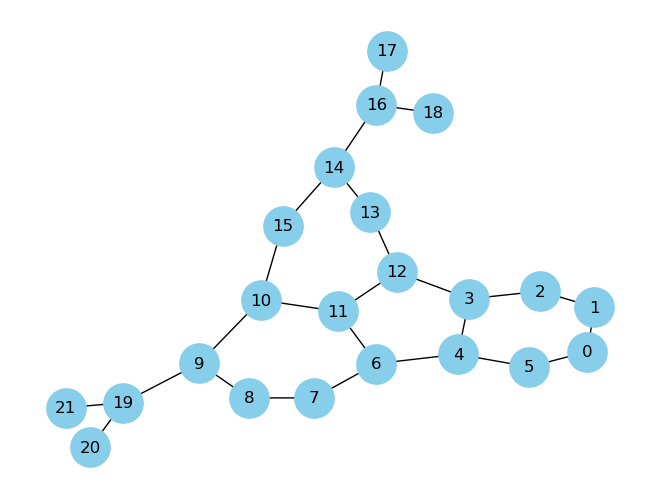

In [21]:
x = data.x.numpy()  # Assuming node features are stored in 'x'
edge_index = data.edge_index.numpy()  # Assuming edge information is in 'edge_index'
G = nx.Graph()

# Add nodes with features
for i in range(x.shape[0]):
    G.add_node(i, features=x[i])
# Add edges
for j in range(edge_index.shape[1]):
    G.add_edge(edge_index[0, j], edge_index[1, j])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=800, cmap=plt.cm.Blues)
plt.show()

## HCP Data using Simeon preproc

In [18]:
from sklearn.decomposition import FastICA


def create_fc_matrices(scan, window_size=30, step_size=10):
    """
    Create functional connectivity matrices using a sliding window approach.
    """
    n_timepoints = scan.shape[1]
    fc_matrices = []

    for start in range(0, n_timepoints - window_size + 1, step_size):
        window = scan[:, start:start + window_size]
        correlation_matrix = np.corrcoef(window)   # pearson correlation 
        fc_matrices.append(correlation_matrix)

    return fc_matrices


def create_fc_matrices_dbgsl(scan, window_size=30, step_size=10):
    """
    Create functional connectivity matrices using a sliding window approach.
    """
    n_timepoints = scan.shape[1]
    t_repetition = (n_timepoints - 2*(window_size - 1) - 1)//(step_size + 1)
    fc_matrices = []

    for t in range(t_repetition):
        window = scan[:, t*step_size:t*step_size+window_size]
        correlation_matrix = np.corrcoef(window)   # pearson correlation 
        fc_matrices.append(correlation_matrix)

    return fc_matrices


def create_ica_fc_matrices(scan, window_size=30, step_size=30, n_components=360):
    """
    Create functional connectivity matrices using ICA on sliding windows.
    """
    n_timepoints = scan.shape[1]
    fc_matrices = []

    for start in range(0, n_timepoints - window_size + 1, step_size):
        window = scan[:, start:start + window_size]
        ica = FastICA(n_components=n_components, random_state=42)
        ica_components = ica.fit_transform(window)
        fc_matrix = np.corrcoef(ica_components)
        fc_matrices.append(fc_matrix)

    return fc_matrices



def threshold_fc_matrix(fc_matrix, percentile=5):
    """
    Threshold the FC matrix to keep only the top percentile connections.
    """
    threshold = np.percentile(fc_matrix[np.tril_indices_from(fc_matrix, k=-1)], 100 - percentile)   
    graph = (fc_matrix > threshold).astype(int)
    np.fill_diagonal(graph, 0)  # remove self-edges
    return graph


def create_networkx_graph(matrix):
    G = nx.Graph(matrix)
    return G


def convert_to_pyg_graph(nx_graph, label):
    graph = nx.Graph(nx_graph)
    edges = torch.tensor(list(graph.edges), dtype=torch.long).t().contiguous()
    x = torch.tensor(np.identity(graph.number_of_nodes()), dtype=torch.float)
    y = torch.tensor([label], dtype=torch.long)
    return Data(x=x, edge_index=edges, y=y)

In [21]:
# ----------- One raw as example -------------------------

data_path = '../data/hcp/raw'
file_name = '100206_0.npy'
file_path = os.path.join(data_path, file_name)
print('FILE_PATH: ', file_path)
time_series_data = np.load(file_path)[:, :490]
print('time_series_data SHAPE: ', time_series_data.shape)
label = int(os.path.basename(file_path).split('_')[-1].split('.')[0])

fc_matrices = create_fc_matrices(time_series_data)
fc_matrices_dbgsl = create_fc_matrices_dbgsl(time_series_data)
fc_matrices_dbgsl_tn = torch.tensor(fc_matrices_dbgsl).reshape(1, len(fc_matrices_dbgsl), 360, 360) # --> new simeon
print('fc_matrices_39 SHAPE: ', fc_matrices_dbgsl_tn.shape)

fc_matrices_tn = torch.tensor(fc_matrices).reshape(1, len(fc_matrices), 360, 360)
print('fc_matrices_tn SHAPE: ', fc_matrices_tn.shape)
graphs = [threshold_fc_matrix(fc) for fc in fc_matrices] 
graph = graphs[0]
graph_nx = convert_to_pyg_graph(graph, label)

# ----------- One raw as example -------------------------


FILE_PATH:  ../data/hcp/raw/100206_0.npy
time_series_data SHAPE:  (360, 490)
fc_matrices_39 SHAPE:  torch.Size([1, 39, 360, 360])
fc_matrices_tn SHAPE:  torch.Size([1, 47, 360, 360])


In [40]:
batch_size = 1   # remember to change
lr = 0.003
n_episodes = 1000   # remember to change
device = 'cpu'
n_itcn_layers = 3
n_gru_layers = 1
n_neurons = 360
tau = 0.1
kernel_list = [3, 5, 7]
itcn_d = 9
ebd_d = 3
gcn_d = 5
n_classes = 1

T = 490
len_window = 30   
stride = 10  
t_repetition = (T - 2*(len_window - 1) - 1)//(stride + 1)
print('t_repetition: ', t_repetition)


def get_x_split(x: pt.Tensor) -> pt.Tensor:
    x_split = pt.stack([x[:, :, t*stride:t*stride+len_window] for t in range(t_repetition)], 1)
    return x_split.float()

def get_node_features(x_split: pt.Tensor) -> pt.Tensor:
    x_split_avg = pt.mean(x_split, -1, keepdim=True)
    x_split_std = pt.std(x_split, -1, keepdim=True)
    x_split_cov = pt.matmul(x_split - x_split_avg, pt.transpose(x_split - x_split_avg, 2, 3))
    node_features = x_split_cov/pt.matmul(x_split_std, pt.transpose(x_split_std, 2, 3))
    return node_features

def get_coo(adjacency_matrix: pt.Tensor) -> pt.Tensor:
    i = 0
    edge_indices = pt.nonzero(adjacency_matrix > 0, as_tuple=False).T
    edge_index_batch = pt.clone(edge_indices[1:3, :])
    for t in range(len(edge_indices[0])):
        if i < edge_indices[0][t]:
            i = i + 1
            n_nodes = max(edge_indices[1][t-1], edge_indices[2][t-1])+1
            edge_index_batch[0][t:] = edge_index_batch[0][t:] + n_nodes
            edge_index_batch[1][t:] = edge_index_batch[1][t:] + n_nodes
    edge_attr_batch = adjacency_matrix[adjacency_matrix > 0].unsqueeze(-1)
    batch = edge_indices[0]
    return edge_index_batch, edge_attr_batch, batch

import torch.nn.functional as F

def construct_graph(x_ebd: torch.Tensor) -> torch.Tensor:
    batch_size = x_ebd.shape[0]
    batch_adjacency_matrices = []

    for i in range(batch_size):
        sample = x_ebd[i]
        sample = F.softmax(sample, -1)
        adjacency_matrix = torch.matmul(sample, sample.transpose(1, 2))
        batch_adjacency_matrices.append(adjacency_matrix)
    adjacency_matrix_batch = torch.stack(batch_adjacency_matrices, dim=0)

    return adjacency_matrix_batch

def sparsify(adjacency_matrix_batch: torch.Tensor) -> torch.Tensor:
    threshold = torch.nn.parameter.Parameter(torch.full((1,), -5.0))
    batch_sparse_adjacency = []

    for i in range(adjacency_matrix_batch.size(0)):
        adjacency_matrix = adjacency_matrix_batch[i]
        sparse_adjacency = F.relu(adjacency_matrix - torch.sigmoid(threshold))
        batch_sparse_adjacency.append(sparse_adjacency)
    sparse_adjacency_batch = torch.stack(batch_sparse_adjacency, dim=0)

    return sparse_adjacency_batch



time_series_torch = torch.from_numpy(time_series_data).reshape(1, time_series_data.shape[0], time_series_data.shape[1])
print('RESHAPING time_series_data: ', time_series_torch.shape)

x_split = get_x_split(time_series_torch)

print('SPLITTING WINDOW time_series_data: ', x_split.shape)



t_repetition:  39
RESHAPING time_series_data:  torch.Size([1, 360, 490])
SPLITTING WINDOW time_series_data:  torch.Size([1, 39, 360, 30])


In [27]:
data_path = '../data/hcp/raw'
dataset_input = []
dataset_ground = []
for file_name in os.listdir(data_path):
    if file_name.endswith(".npy"):
        file_path = os.path.join(data_path, file_name)
        time_series_data = np.load(file_path)[:, :490]
        time_series_torch = torch.from_numpy(time_series_data).reshape(1, 
                                             time_series_data.shape[0], time_series_data.shape[1])
        x_split = get_x_split(time_series_torch)
        dataset_input.append(x_split)
        fc_matrices = create_fc_matrices_dbgsl(time_series_data)
        fc_matrices_tn = torch.tensor(fc_matrices).reshape(1, len(fc_matrices), 360, 360)
        ground_truth = fc_matrices_tn.float()
        dataset_ground.append(ground_truth)

In [28]:
input_tensor = torch.cat(dataset_input, dim=0)
ground_truth_tens = torch.cat(dataset_ground, dim=0)
print(input_tensor.shape)
print(ground_truth_tens.shape)

torch.Size([300, 39, 360, 30])
torch.Size([300, 39, 360, 360])


In [41]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class InceptionTC(nn.Module):
    def __init__(self, itcn_d, dilation):
        super(InceptionTC, self).__init__()
        self.t_conv_0 = nn.Conv1d(itcn_d, itcn_d//3, kernel_list[0], dilation=dilation, padding=(kernel_list[0]-1)*dilation)
        self.t_conv_1 = nn.Conv1d(itcn_d, itcn_d//3, kernel_list[1], dilation=dilation, padding=(kernel_list[1]-1)*dilation)
        self.t_conv_2 = nn.Conv1d(itcn_d, itcn_d//3, kernel_list[2], dilation=dilation, padding=(kernel_list[2]-1)*dilation)
        self.bn = nn.BatchNorm1d(itcn_d)

    def forward(self, x_split, dilation):
        x_cat = [
            self.clip_end(self.t_conv_0(x_split), 0, dilation),
            self.clip_end(self.t_conv_1(x_split), 1, dilation),
            self.clip_end(self.t_conv_2(x_split), 2, dilation)
        ]
        x_cat = torch.cat(x_cat, 1)
        x_out = F.relu(self.bn(x_cat))
        return x_out

    def clip_end(self, x, i, dilation):
        padding = (kernel_list[i] - 1) * dilation
        x = x[:, :, :-padding].contiguous()
        return x


class ITCN(nn.Module):
    def __init__(self, batch_size, n_neurons, itcn_d, t_repetition, kernel_list):
        super(ITCN, self).__init__()
        self.batch_size = batch_size
        self.n_neurons = n_neurons
        self.itcn_d = itcn_d
        self.t_repetition = t_repetition
        self.kernel_list = kernel_list
        self.inception_tc_2 = InceptionTC(itcn_d, 2)  
        self.inception_tc_4 = InceptionTC(itcn_d, 4)
        self.inception_tc_6 = InceptionTC(itcn_d, 6)

    def forward(self, x_split):
        x_split = x_split.reshape(self.batch_size * self.n_neurons, self.itcn_d, self.t_repetition)
        x_split = self.inception_tc_2(x_split, 2)
        x_split = self.inception_tc_4(x_split, 4)
        x_split = self.inception_tc_6(x_split, 6)
        x_split = x_split.reshape(self.batch_size, self.t_repetition, self.n_neurons, self.itcn_d)
        return x_split


class RegionEmbedding(nn.Module):
    def __init__(self, len_window, itcn_d, ebd_d, batch_size, n_neurons, t_repetition, kernel_list):
        super(RegionEmbedding, self).__init__()
        self.input_layer = nn.Linear(len_window, itcn_d)
        self.itcn_layer = ITCN(batch_size, n_neurons, itcn_d, t_repetition, kernel_list)
        self.output_fc = nn.Sequential(nn.Linear(itcn_d, itcn_d), nn.ReLU(), nn.Linear(itcn_d, ebd_d))

    def forward(self, x_split):
        x_split = self.input_layer(x_split)
        x_split = self.itcn_layer(x_split)
        x_split = self.output_fc(x_split)
        return x_split


class SpatialAttention(nn.Module):
    def __init__(self, n_neurons, tau):
        super(SpatialAttention, self).__init__()
        n_neurons_ebd = int(tau * n_neurons)
        self.spatial_attn = nn.Sequential(
            nn.Linear(n_neurons, n_neurons_ebd, bias=False),
            nn.ReLU(),
            nn.Linear(n_neurons_ebd, n_neurons, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x_ebd):
        x_spatial_attn = torch.mean(x_ebd, -1)
        x_spatial_attn = self.spatial_attn(x_spatial_attn)
        x_spatial_attn = x_spatial_attn.unsqueeze(-1)
        return x_spatial_attn


class TemporalAttention(nn.Module):
    def __init__(self, t_repetition, tau, n_neurons, ebd_d):
        super(TemporalAttention, self).__init__()
        T_ebd = int(tau * t_repetition)
        self.temporal_attn = nn.Sequential(
            nn.Linear(t_repetition, T_ebd, bias=False),
            nn.ReLU(),
            nn.Linear(T_ebd, t_repetition, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x_ebd):
        x_temporal_attn = x_ebd.view(-1, t_repetition, n_neurons * ebd_d)
        x_temporal_attn = torch.mean(x_temporal_attn, -1)
        x_temporal_attn = self.temporal_attn(x_temporal_attn)
        x_temporal_attn = x_temporal_attn.view(-1, t_repetition, 1, 1)
        return x_temporal_attn


class MyModel(nn.Module):
    def __init__(self, len_window, itcn_d, ebd_d, batch_size, n_neurons, t_repetition, tau, kernel_list):
        super(MyModel, self).__init__()
        self.region_embd = RegionEmbedding(len_window, itcn_d, ebd_d, batch_size, n_neurons, t_repetition, kernel_list)
        self.spat_attention = SpatialAttention(n_neurons, tau)
        self.temp_attention = TemporalAttention(t_repetition, tau, n_neurons, ebd_d)

    def forward(self, x):
        x_ebd = self.region_embd(x)
        x_spatial_attention = self.spat_attention(x_ebd)
        x_ebd = x_spatial_attention * x_ebd
        x_temporal_attn = self.temp_attention(x_ebd)
        x_ebd = x_temporal_attn * x_ebd
        return x_ebd


# Instantiate your model
model = MyModel(len_window, itcn_d, ebd_d, batch_size, n_neurons, t_repetition, tau, kernel_list)



In [30]:
import torch.optim as optim

train_input = input_tensor[0:240]
test_input = input_tensor[241:300]
train_ground = ground_truth_tens[0:240]
test_ground = ground_truth_tens[241:300]

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

n_samples_train = train_input.size(0)
n_batches_train = n_samples_train // batch_size

for epoch in range(n_episodes):
    total_loss = 0.0
    model.train()
    for i in range(n_batches_train):
        start_idx = i * batch_size
        end_idx = (i + 1) * batch_size
        x_split_batch = train_input[start_idx:end_idx]
        ground_truth_batch = train_ground[start_idx:end_idx]
        optimizer.zero_grad()
        outputs = model(x_split_batch)
        adjacency_matrix = construct_graph(outputs)
        sparse_adjacency = sparsify(adjacency_matrix)
        loss = criterion(sparse_adjacency, ground_truth_batch)
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

    average_loss = total_loss / n_batches_train
    print(f'Epoch {epoch + 1}/{n_episodes}, Average Loss: {average_loss}')


    


Epoch 1/100, Average Loss: 0.10520316660404205
Epoch 2/100, Average Loss: 0.10508951172232628
Epoch 3/100, Average Loss: 0.10506994277238846
Epoch 4/100, Average Loss: 0.10506955813616514
Epoch 5/100, Average Loss: 0.1050680112093687
Epoch 6/100, Average Loss: 0.10506728012114763
Epoch 7/100, Average Loss: 0.10506681445986032
Epoch 8/100, Average Loss: 0.10506607312709093
Epoch 9/100, Average Loss: 0.10506535414606333
Epoch 10/100, Average Loss: 0.10506449267268181
Epoch 11/100, Average Loss: 0.10506337322294712
Epoch 12/100, Average Loss: 0.10506176017224789
Epoch 13/100, Average Loss: 0.10505902674049139
Epoch 14/100, Average Loss: 0.10505409725010395
Epoch 15/100, Average Loss: 0.1050462992861867
Epoch 16/100, Average Loss: 0.10503544006496668
Epoch 17/100, Average Loss: 0.10502195823937654
Epoch 18/100, Average Loss: 0.10500869806855917
Epoch 19/100, Average Loss: 0.10499266162514687
Epoch 20/100, Average Loss: 0.10497252736240625
Epoch 21/100, Average Loss: 0.10494766756892204
Epo

In [31]:
n_samples_test = test_input.size(0)
n_batches_test = n_samples_test // batch_size

total_loss_test = 0.0

model.eval() 

with torch.no_grad():  # Disable gradient computation during testing
    for i in range(n_batches_test):
        start_idx = i * batch_size
        end_idx = (i + 1) * batch_size
        x_split_batch_test = test_input[start_idx:end_idx]
        ground_truth_batch_test = test_ground[start_idx:end_idx]

        outputs_test = model(x_split_batch_test)
        adjacency_matrix_test = construct_graph(outputs_test)
        sparse_adjacency_test = sparsify(adjacency_matrix_test)
        loss_test = criterion(sparse_adjacency_test, ground_truth_batch_test)
        total_loss_test += loss_test.item()

average_loss_test = total_loss_test / n_batches_test
print(f'Testing - Average Loss: {average_loss_test}')

Testing - Average Loss: 0.09685724973678589


## One subject only

In [42]:
print('x_split shape: ', x_split.shape)
print('fc_matrices_dgbsl SHAPE: ', fc_matrices_dbgsl_tn.shape)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

for epoch in range(n_episodes):
    optimizer.zero_grad()
    outputs = model(x_split)
    adjacency_matrix = construct_graph(outputs)
    sparse_adjacency = sparsify(adjacency_matrix)
    ground_truth = fc_matrices_dbgsl_tn.float()
    loss = criterion(sparse_adjacency, ground_truth)
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch + 1}/{n_episodes}, Loss: {loss.item()}')

x_split shape:  torch.Size([1, 39, 360, 30])
fc_matrices_dgbsl SHAPE:  torch.Size([1, 39, 360, 360])
Epoch 1/1000, Loss: 0.09225441515445709
Epoch 2/1000, Loss: 0.09214719384908676
Epoch 3/1000, Loss: 0.09208934009075165
Epoch 4/1000, Loss: 0.09204959869384766
Epoch 5/1000, Loss: 0.09202088415622711
Epoch 6/1000, Loss: 0.09199746698141098
Epoch 7/1000, Loss: 0.09197724610567093
Epoch 8/1000, Loss: 0.09195952117443085
Epoch 9/1000, Loss: 0.09194444119930267
Epoch 10/1000, Loss: 0.09193232655525208
Epoch 11/1000, Loss: 0.09192299097776413
Epoch 12/1000, Loss: 0.09191613644361496
Epoch 13/1000, Loss: 0.09191137552261353
Epoch 14/1000, Loss: 0.09190823137760162
Epoch 15/1000, Loss: 0.09190625697374344
Epoch 16/1000, Loss: 0.09190506488084793
Epoch 17/1000, Loss: 0.09190438687801361
Epoch 18/1000, Loss: 0.09190399944782257
Epoch 19/1000, Loss: 0.09190378338098526
Epoch 20/1000, Loss: 0.0919036790728569
Epoch 21/1000, Loss: 0.09190360456705093
Epoch 22/1000, Loss: 0.09190356731414795
Epoch 2